<a href="https://colab.research.google.com/github/Litharsan11/Telco_Customer_Churn_ML_CW/blob/main/2425446_20240872_Litharsan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive/MyDrive/Machine_Learning/WA_Fn-UseC_-Telco-Customer-Churn.csv')

ValueError: Mountpoint must be in a directory that exists

In [6]:
from google.colab import drive
drive.mount('/content/drive')

# Construct the full path to your CSV file after mounting the drive
data = '/content/drive/MyDrive/Machine_Learning/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# You can now use csv_file_path to read your data in subsequent cells

Mounted at /content/drive


Shape: (7043, 21)

Columns:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing values:
 customerID   

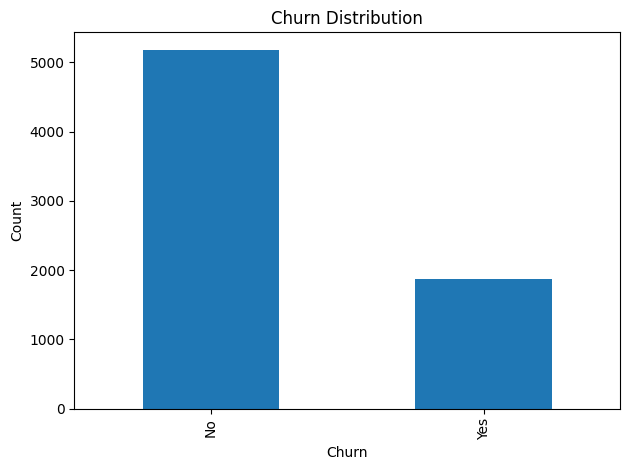

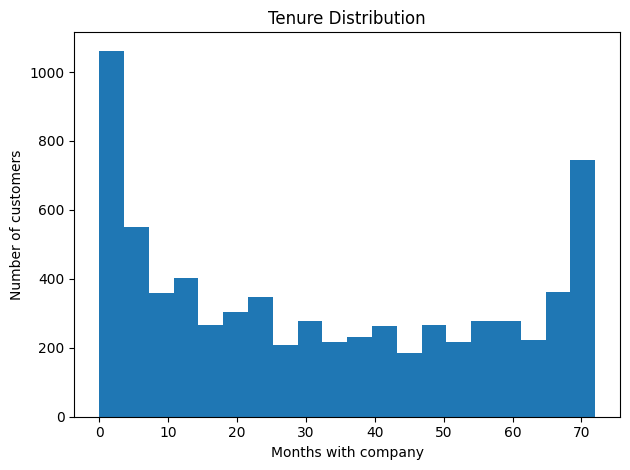

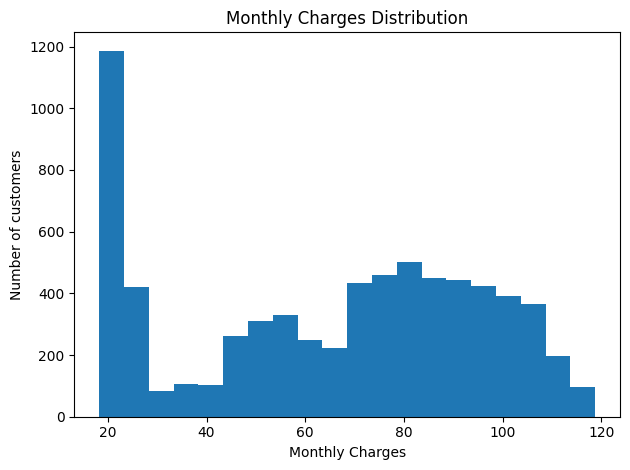


After encoding, shape: (7043, 31)
Train shape: (5634, 30) Test shape: (1409, 30)

Preprocessing completed!


/tmp/ipython-input-2592254518.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [2]:
# ============================
# 1. IMPORT LIBRARIES
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ============================
# 2. LOAD DATASET
# ============================
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# ============================
# 3. BASIC EDA (TEXT OUTPUT)
# ============================
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

print("\nFirst 5 rows:\n", df.head())

# Churn distribution
print("\nChurn value counts:\n", df["Churn"].value_counts())
print("\nChurn rate:\n", df["Churn"].value_counts(normalize=True))

# ============================
# 4. SIMPLE PLOTS FOR EDA
# ============================

# (a) Churn distribution
plt.figure()
df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# (b) Tenure distribution
plt.figure()
plt.hist(df["tenure"], bins=20)
plt.title("Tenure Distribution")
plt.xlabel("Months with company")
plt.ylabel("Number of customers")
plt.tight_layout()
plt.show()

# (c) Monthly charges distribution
plt.figure()
plt.hist(df["MonthlyCharges"], bins=20)
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of customers")
plt.tight_layout()
plt.show()

# ============================
# 5. DATA PREPROCESSING
# ============================

# ---- 5.1 Handle TotalCharges (string -> numeric + missing) ----
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# ---- 5.2 Drop customerID (ID field, not useful for prediction) ----
df = df.drop(columns=["customerID"])

# ---- 5.3 Encode binary Yes/No columns ----
binary_cols = ["Partner", "Dependents", "PhoneService",
               "PaperlessBilling", "Churn"]

for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

# ---- 5.4 One-hot encode multi-category categorical columns ----
multi_cols = [
    "gender", "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"
]

df_encoded = pd.get_dummies(df, columns=multi_cols, drop_first=True)

print("\nAfter encoding, shape:", df_encoded.shape)

# ============================
# 6. TRAIN–TEST SPLIT + SCALING
# ============================

# Target variable (label)
y = df_encoded["Churn"]

# Feature matrix
X = df_encoded.drop(columns=["Churn"])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# Scale numerical features (tenure, MonthlyCharges, TotalCharges)
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("\nPreprocessing completed!")
